Enter the desired number of intensity levels: 2


array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [  0.,   0.,   0., ..., 255.,   0., 255.],
       [  0.,   0.,   0., ..., 255., 255., 255.],
       [  0.,   0.,   0., ..., 255., 255., 255.]])

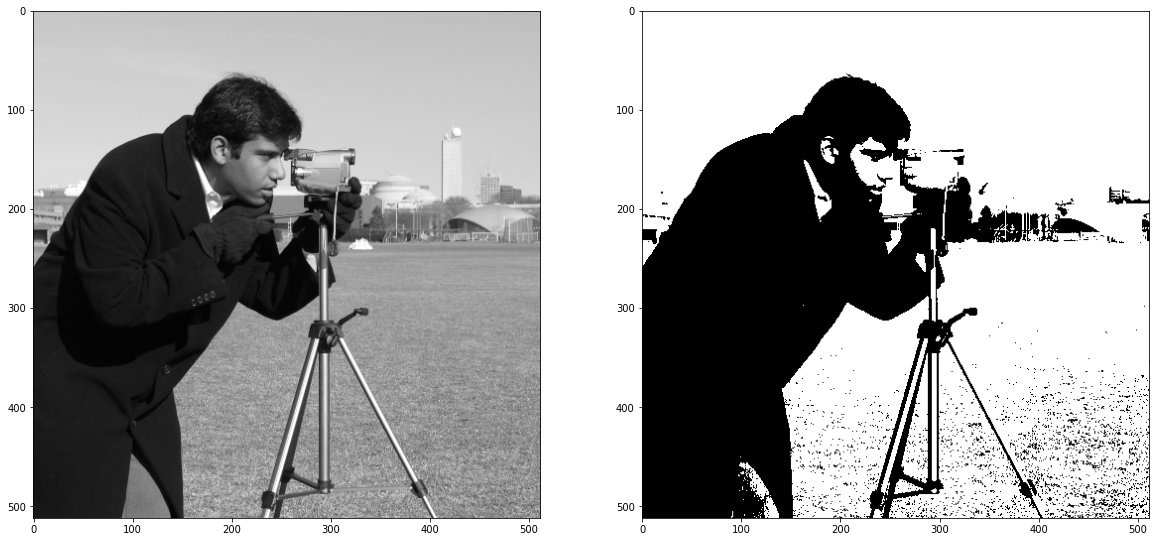

In [29]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 
from skimage import data


images = data.camera()
levels = int(input("Enter the desired number of intensity levels: "))
dev = 255/(levels-1)
new_Im = np.round(images/dev)*dev
fig,arr = plt.subplots(1,2)
arr[0].imshow(images)
arr[1].imshow(new_Im)
new_Im   

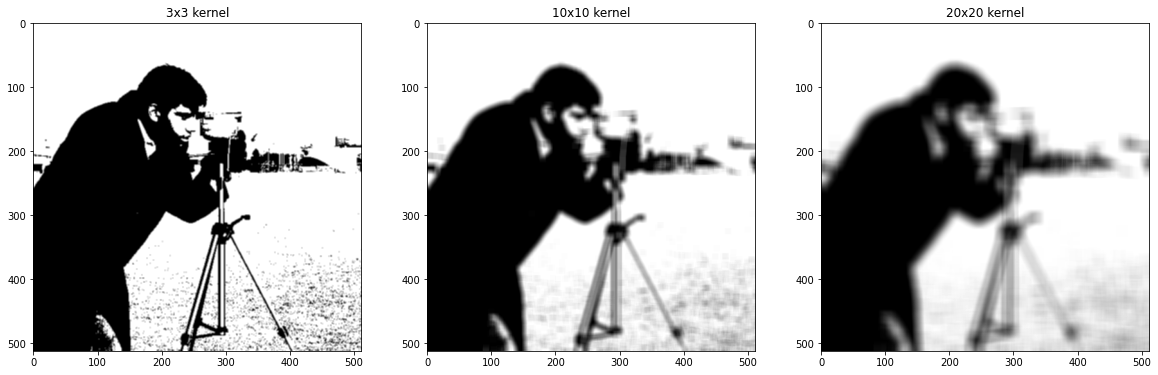

In [30]:
#Using openCV to blur image using a normalized block filter
f, axarr = plt.subplots(1, 3)
axarr[0].imshow(cv2.blur(new_Im,(3,3)))
axarr[0].set_title('3x3 kernel')

axarr[1].imshow(cv2.blur(new_Im,(10,10)))
axarr[1].set_title('10x10 kernel')

axarr[2].imshow(cv2.blur(new_Im,(20,20)))
axarr[2].set_title('20x20 kernel');

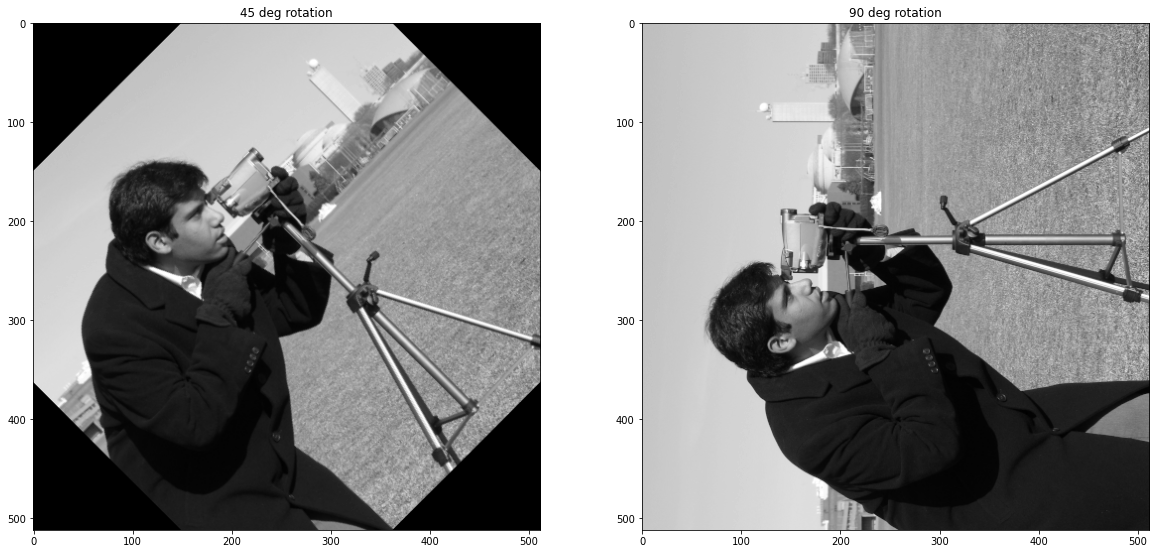

In [31]:
rows,cols = images.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),45,1)
dst_45 = cv2.warpAffine(images,M,(cols,rows))

M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst_90 = cv2.warpAffine(images,M,(cols,rows))

f, axarr = plt.subplots(1, 2)
axarr[0].imshow(dst_45)
axarr[0].set_title('45 deg rotation')

axarr[1].imshow(dst_90)
axarr[1].set_title('90 deg rotation');

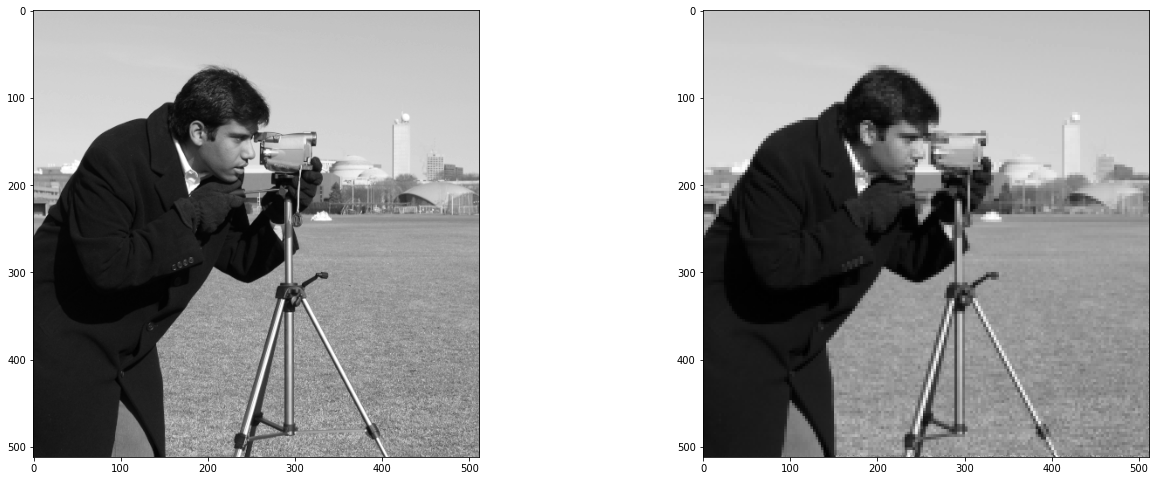

In [32]:
import numpy as np
height, width = images.shape[:2]
block_size = 3
averaged_image_3_3 = images.copy()
for i in range(0, height-block_size+1, block_size):
    for j in range(0, width-block_size+1, block_size):
        block = images[i:i+block_size, j:j+block_size]
        avg = block.mean()
        averaged_image_3_3[i:i+block_size, j:j+block_size] = avg
fig,arr= plt.subplots(1,2)
fig.subplots_adjust(wspace=0.5) # increase the horizontal space between subplots to 0.5
arr[0].imshow(images)
arr[1].imshow(averaged_image_3_3)